# Project Title 

In [1]:
project_title="Pretpark"

# 1 system setup

***Credits***
...

**Working directory setup**
* **/Data/** for all data related maps
* **/Data/raw/** for all raw incoming data
* **/Data/clean/** for all clean data to be used during analysis
* **/Data/staging/** for all data save during cleaning 
* **/Data/temp/** for all tempral data saving 
* **/Figs/temp/** for all tempral data saving 
* **/Docs/** reference documentation
* **/Results/** reference documentation
* **/Code/** reference documentation


**references:**
https://docs.python-guide.org/writing/structure/



Setup packages required for analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
%matplotlib inline


Added modules

In [3]:
import difflib

Set working directories 

In [4]:
print("Current working directory: {0}".format(os.getcwd()))
working_dir= os.getcwd()

Current working directory: /home/mike/BigD/Data-Science/Notebooks/Case_2


Code below created project structure

In [5]:
arr_map_structure  = [os.getcwd() + map for map in   ['/Data','/Data/raw','/Data/clean','/Data/staging',
                      '/Data/temp','/Figs','/Figs/temp','/Docs','/Results','/Code'] ]

[os.makedirs(map) for map in arr_map_structure if  not os.path.exists( map)]

[]

# 2 Import data

show contents of working directory

In [6]:
os.listdir(working_dir)

['.ipynb_checkpoints',
 'Casus 2 - Met Income Tabel.ipynb',
 'Casus 2 - Mike.ipynb',
 'Casus 2 - Robin-Copy1.ipynb',
 'Casus 2 - Robin-Copy2.ipynb',
 'Casus 2 - Robin.html',
 'Casus 2 - Robin.ipynb',
 'Code',
 'Data',
 'Docs',
 'eBird API key.txt',
 'eBird.ipynb',
 'ED2017',
 'export.html',
 'Figs',
 'kaggle_income.csv',
 'kaggle_income.csv.zip',
 'lcd_2013_2017.csv',
 'Results',
 'results.csv',
 'results_2013.csv',
 'results_2013_2017.csv',
 'Untitled.ipynb']

***Importeren van pretpark ongevallen API***

In [7]:
raw_injury = pd.read_excel('https://query.data.world/s/owky3fye7jjblsjo2wjn3g3jj7cuy3')
raw_injury.head()

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
0,2032,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2/12/2013,I Fly,SV024,F,37,Mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN
1,1897,Willie G's Post Oak Inc. - Pleasure Pier,Galveston,TX,3/2/2013,Gulf Glider,GS-11-10-WG-14,F,43,Knee,Alleged arthroscopy to knee,Hit her knee on a chair on the ride,Prior history of problems with this knee. Firs...
2,837,Great Wolf Lodge,Grapevine,TX,3/3/2013,Howlin Tornado,0643-C1-T1-TN60,F,NaN,Right Shoulder,Pain in shoulder,Injured person fell out of raft and hit her sh...,NaN
3,99,Six Flags Fiesta Texas,San Antonio,TX,3/3/2013,Scooby Doo Ghost Blasters,NaN,F,51,Lower Leg,Contusion,Guest backed into advancing car,NaN
4,55,"Ray Cammack Shows, Inc. (RCS)",Laveen,AZ,3/11/2013,Alien Abduction,862162,F,17,Head,Laceration,unknown guest did not report to operator or at...,Upon investigation found no areas of concern a...


***Importeren van stad populatie API***

In [8]:
raw_pop = pd.read_excel('https://www2.census.gov/programs-surveys/popest/tables/2010-2019/cities/totals/SUB-IP-EST2019-ANNRNK.xlsx')
raw_pop.head()

,table with row headers in column B and column headers in rows 3 through 4,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rank,Geographic Area,2010-04-01 00:00:00,NaN,Population Estimate (as of July 1),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0


De dataset begind niet bij de juiste kolomnamen. De kolomnamen staan in twee verschillende rijen. Om de dataset goed te kunnen gebruiken worden de kolomnamen aangepast en de eerste drie regels verwijderd.

In [9]:
headers1 = raw_pop[raw_pop.index == 1].values.tolist()
headers1 = headers1[0][0:2]
headers2 = raw_pop[raw_pop.index == 2].values.tolist()
headers2 = headers2[0][2:]
headers = headers1 + headers2
raw_pop.columns = headers
raw_pop = raw_pop.drop([0,1,2])
raw_pop.head()

,Rank,Geographic Area,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0
5,3,"Chicago city, Illinois",2695598,2695652,2697477,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0
6,4,"Houston city, Texas",2099451,2095517,2100280,2126032.0,2161593.0,2199391.0,2241826.0,2286908.0,2309544.0,2316750.0,2318573.0,2320268.0
7,5,"Phoenix city, Arizona",1445632,1446691,1449038,1469796.0,1499274.0,1526491.0,1555445.0,1583690.0,1612199.0,1633560.0,1654675.0,1680992.0


***Importeren van gemiddelde loon van een stad API***

Importeer Kaggle om gebruik te maken van de API

In [10]:
#pip install kaggle

Zorg ervoor dat een account is aangemaakt op kaggle.com. Ga naar https://www.kaggle.com/<username>/account en klik op 'Create new API token'. Een .json bestand wordt gedownload. Zet dit .json bestand in de .kaggle map dat is aangemaakt bij het installeren van de kaggle module (C:\Users\.kaggle\)

In [11]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

Met toegang tot de api kan het csv bestand worden gedownload. Is het bestand al gedownload is het resultaat False.

In [12]:
api.dataset_download_file('goldenoakresearch/us-household-income-stats-geo-locations','kaggle_income.csv')

False

Je zou denken dat het een csv bestand download. maar het download een zip bestand. Dit zipbestand moet eerst uitgepakt worden.

In [13]:
from zipfile import ZipFile
zip = ZipFile('kaggle_income.csv.zip')
zip.extractall()

Na het uitpakken kan de csv bestand worden opgehaald

In [14]:
raw_inc = pd.read_csv('kaggle_income.csv', encoding='latin-1')
raw_inc.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


# 3 Exploratory Data Analysis

## 3.1 inspectie van variabelen 

In [15]:
whos

Variable            Type         Data/Info
------------------------------------------
KaggleApi           type         <class 'kaggle.api.kaggle<...>_api_extended.KaggleApi'>
ZipFile             type         <class 'zipfile.ZipFile'>
api                 KaggleApi    <kaggle.api.kaggle_api_ex<...>object at 0x7f75d091b5e0>
arr_map_structure   list         n=10
difflib             module       <module 'difflib' from '/<...>ib/python3.8/difflib.py'>
display             function     <function display at 0x7f7603758d30>
headers             list         n=14
headers1            list         n=2
headers2            list         n=12
np                  module       <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os                  module       <module 'os' from '/home/<...>da3/lib/python3.8/os.py'>
pd                  module       <module 'pandas' from '/h<...>ages/pandas/__init__.py'>
plt                 module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
project_tit

## 3.2.1 Injury dataframe

In [16]:
raw_injury.shape

(542, 13)

In [17]:
raw_injury.dtypes

Injury Report REC     int64
Name of Operation    object
City                 object
St                   object
Injury Date          object
Ride Name            object
Serial No            object
Gender               object
Age                  object
Body Part            object
Alleged Injury       object
Cause of Injury      object
Other                object
dtype: object

Aan de datatypes valt direct op dat alle kollomen tekst bevatten, behalve de 'Injury Report REC'. Bij het vergelijken van de datatypes wordt verwacht dat de kolom 'Age' een integer hoort te zijn en de kolom 'Injury date'een Datetime

In [18]:
raw_injury.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542 entries, 0 to 541
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Injury Report REC  542 non-null    int64 
 1   Name of Operation  542 non-null    object
 2   City               542 non-null    object
 3   St                 542 non-null    object
 4   Injury Date        519 non-null    object
 5   Ride Name          541 non-null    object
 6   Serial No          390 non-null    object
 7   Gender             533 non-null    object
 8   Age                503 non-null    object
 9   Body Part          537 non-null    object
 10  Alleged Injury     527 non-null    object
 11  Cause of Injury    522 non-null    object
 12  Other              124 non-null    object
dtypes: int64(1), object(12)
memory usage: 55.2+ KB


Er zijn kolommen waarin waardes missen. 

De kolommen 'Serial No' en 'Other' missen veel waardes. 'Serial No' bestaat uit verschillende serie nummers die niet relevant zijn voor de analyse en kan dus worden verwijderd. In de 'Other' kolom staan opmerkingen die zijn toegevoegd aan de dataset, het kan interessant zijn om dit te behouden maar is geen bedreiging voor de uitkomsten. De kolommen 'Alleged Injury' en 'cause of Injury' missen ook waardes. Hier kan misschien onderzocht worden of er uit deze kolommen interesante gegevens zijn opgeslagen of dat dit ook verwijderd kan worden uit de data.

Er ontbreken waardes in 'Injury Date', 'Gender', 'Age', 'Body Part', en één waarneming in 'Ride Name'. Deze waardes kunnen interessant zijn voor de analyse. Het is belangrijk om deze missende waardes goed te onderzoeken.

In [19]:
pd.set_option("display.max_columns",       None)

***City***

In [20]:
raw_injury['City'].unique()

array(['Austin', 'Galveston', 'Grapevine', 'San Antonio', 'Laveen',
       'Seguin', 'Arlington', 'Mesquite', 'Cedar Hill', 'Englewood',
       'Poynor', 'Spring', 'Dallas', 'South Padre Island', 'Anthony',
       'Houston', 'New Braunfels', 'Amarillo', 'Longview', 'McAllen',
       'Waco', 'Irving', 'Mansfield', 'Kemah', 'Pflugerville', 'Garland',
       'Roanoke', 'White Settlement', 'El Paso', 'Frisco', 'The Colony',
       'DALLAS', 'HOUSTON', 'GRAPEVINE', 'SEGUIN', 'ARLINGTON', 'EL PASO',
       'SAN ANTONIO', 'LYFORD', 'SPRING', 'AMARILLO', 'NEW BRAUNFELS',
       'PFLUGERVILLE', 'CORPUS CHRISTI', 'MESQUITE', 'GALVESTON',
       'ANTHONY', 'GARLAND', 'SOUTH PADRE ISLAND', 'IRVING', 'Del Valle',
       'Grand Prairie'], dtype=object)

Er zijn veel steden die met hoofdletters of met kleine letters worden geschreven. Om dit op te lossen worden alle waarden omgezet naar kleine letters

In [21]:
raw_injury['City'] = raw_injury['City'].str.title()
raw_injury['City'].unique()

array(['Austin', 'Galveston', 'Grapevine', 'San Antonio', 'Laveen',
       'Seguin', 'Arlington', 'Mesquite', 'Cedar Hill', 'Englewood',
       'Poynor', 'Spring', 'Dallas', 'South Padre Island', 'Anthony',
       'Houston', 'New Braunfels', 'Amarillo', 'Longview', 'Mcallen',
       'Waco', 'Irving', 'Mansfield', 'Kemah', 'Pflugerville', 'Garland',
       'Roanoke', 'White Settlement', 'El Paso', 'Frisco', 'The Colony',
       'Lyford', 'Corpus Christi', 'Del Valle', 'Grand Prairie'],
      dtype=object)

***St***

In [22]:
raw_injury.St.value_counts(normalize=True)

TX    0.988930
AZ    0.009225
FL    0.001845
Name: St, dtype: float64

De state namen in kolom 'St' bestaan voornamelijk uit Texas.

***Injury Date***

In [23]:
raw_injury['Injury Date'].unique()

array(['2/12/2013', '3/2/2013', '3/3/2013', '3/11/2013', '3/12/2013',
       '3/15/2013', '3/16/2013', '3/28/2013', '3/30/2013', '4/6/2013',
       '4/11/2013', '4/12/2013', '4/14/2013', '4/20/2013', '4/27/2013',
       '4/28/2013', '5/11/2013', datetime.datetime(2013, 5, 12, 0, 0),
       '5/12/2013', '5/18/2013', '5/26/2013', '5/27/2013', '5/29/2013',
       '5/31/2013', datetime.datetime(2013, 6, 1, 0, 0), '6/2/2013',
       '6/4/2013', '6/5/2013', '6/6/2013', '6/7/2013', '6/8/2013',
       datetime.datetime(2013, 6, 9, 0, 0), '6/9/2013', '6/13/2013',
       datetime.datetime(2013, 6, 15, 0, 0), '6/18/2013', '6/20/2013',
       '6/22/2013', '6/24/2013', '6/25/2013', '6/26/2013', '6/27/2013',
       datetime.datetime(2013, 6, 27, 0, 0), '6/30/2013',
       datetime.datetime(2013, 6, 30, 0, 0), '7/1/2013', '7/2/2013',
       datetime.datetime(2013, 7, 3, 0, 0), '7/4/2013', '7/5/2013',
       '7/7/2013', '7/9/2013', '7/10/2013', '7/11/2013', '7/13/2013',
       '7/14/2013', '7/16/2013'

Bij het onderzoeken van de dataums in de kolom 'Injury Date' zijn datums opgenomen. Hierin zijn datums opgeslagen als datetime.datetime() of als string. Er zijn ook waardes genoteerd als '#########'.

Als eerst worden de waardes '#########' omgezet naar np.nan. Dit zorgt er voor dat de kolom omgezet kan worden naar datetime en verdere analyse mogelijk maakt.

In [24]:
raw_injury[raw_injury['Injury Date'] == chr(35)* 9] = np.nan
raw_injury.loc[raw_injury['Injury Date'] == chr(35)* 9].count()

Injury Report REC    0
Name of Operation    0
City                 0
St                   0
Injury Date          0
Ride Name            0
Serial No            0
Gender               0
Age                  0
Body Part            0
Alleged Injury       0
Cause of Injury      0
Other                0
dtype: int64

Nu dit is veranderd kan de kolom omgezet worden naar datetime

In [25]:
raw_injury['Injury Date'] = pd.to_datetime(raw_injury['Injury Date'])
print(raw_injury['Injury Date'].dtype)

datetime64[ns]


In [26]:
raw_injury['Injury Date'].unique()

array(['2013-02-12T00:00:00.000000000', '2013-03-02T00:00:00.000000000',
       '2013-03-03T00:00:00.000000000', '2013-03-11T00:00:00.000000000',
       '2013-03-12T00:00:00.000000000', '2013-03-15T00:00:00.000000000',
       '2013-03-16T00:00:00.000000000', '2013-03-28T00:00:00.000000000',
       '2013-03-30T00:00:00.000000000', '2013-04-06T00:00:00.000000000',
       '2013-04-11T00:00:00.000000000', '2013-04-12T00:00:00.000000000',
       '2013-04-14T00:00:00.000000000', '2013-04-20T00:00:00.000000000',
       '2013-04-27T00:00:00.000000000', '2013-04-28T00:00:00.000000000',
       '2013-05-11T00:00:00.000000000', '2013-05-12T00:00:00.000000000',
       '2013-05-18T00:00:00.000000000', '2013-05-26T00:00:00.000000000',
       '2013-05-27T00:00:00.000000000', '2013-05-29T00:00:00.000000000',
       '2013-05-31T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-06-02T00:00:00.000000000', '2013-06-04T00:00:00.000000000',
       '2013-06-05T00:00:00.000000000', '2013-06-06

Nu zijn alle waardes omgezet naar datetime en kan er onderzocht worden wat er met de missende waarden kan worden gedaan.

In [27]:
raw_injury['Injury Date'].isna().sum()

29

In [28]:
raw_injury.loc[raw_injury['Injury Date'].isna()]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
122,253.0,Six Flags Over Texas,Arlington,TX,NaT,Judge Roy Scream,01-1617,F,14,Right wrist,muscoskeletal injury,Fell off railing,NaN
123,253.0,Six Flags Over Texas,Arlington,TX,NaT,LaVibora,Jan-11,F,31,Left Elbow,Contusion,Bumped arm on side of ride,NaN
124,110.0,Dallas Speed Zone - Apex Parks Group LLC,Dallas,TX,NaT,Go Kart Track,NaN,M,0,NaN,NaN,Seizure,NaN
125,63.0,Zuma Fun Center S Houston,Houston,TX,NaT,Go-Karts,6635,F,NaN,Back,Back injury,Go-Kart crashed into rail,NaN
126,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,NaT,iFly Austin,SV024,M,25,Shoulder,Possible dislocation,Instructor Training,NaN
128,65.0,Celebration Station Mesquite,Mesquite,TX,NaT,Bumper Boats,NaN,F,54,Left Knee,Pain,Her knee gave out while exiting the boat.,NaN
130,253.0,Six Flags Over Texas,Arlington,TX,NaT,Runaway Mine Train,01-1611,F,32,Neck,Strain,Jossled by ride,NaN
232,837.0,Great Wolf Lodge,Grapevine,TX,NaT,Totem Slide,0643-O2-T6-DT,M,2,Head,Pain/Tenderness,Rider Behavior,NaN
233,110.0,Dallas Speed Zone - Apex Parks Group LLC,Dallas,TX,NaT,Thunder Road,NaN,F,45,Left knee,Blunt force trauma,Knee hitting steering column,NaN
234,415.0,Kemah Broadway LK - Landry's Crab Shack,Kemah,TX,NaT,Bullet,MVRWC07102,F,10,Collarbone,Collarbone,Parent was not present at park and is unable t...,Parent advised that a medical visit was requir...


In [29]:
raw_injury.loc[raw_injury['Serial No']== 'Jan-11']

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
12,253.0,Six Flags Over Texas,Arlington,TX,2013-04-06,LaVibra,Jan-11,NaN,45,Tail bone,Contusion,Guest slipped off seat,NaN
77,253.0,Six Flags Over Texas,Arlington,TX,2013-07-19,LaVibora,Jan-11,F,50,Tail Bone,Contusion,Tailbone hurt after riding,NaN
112,253.0,Six Flags Over Texas,Arlington,TX,2013-09-01,LaVibora,Jan-11,F,62,Tail Bone,Contusion,Bounced while sitting in the sled,NaN
123,253.0,Six Flags Over Texas,Arlington,TX,NaT,LaVibora,Jan-11,F,31,Left Elbow,Contusion,Bumped arm on side of ride,NaN


Bij één van de waarnemingen staat 'Jan-11' bij 'Serial No', helaas heeft dit niets met de injury datum te maken. De rijen 361, 362, 363, 364, 366, 367 hebben geen enkele kolom een waarde en kunnen direct worden verwijderd. 

In [30]:
raw_injury = raw_injury.drop([361,362,363,364,366,367])
raw_injury['Injury Date'].isna().sum()

23

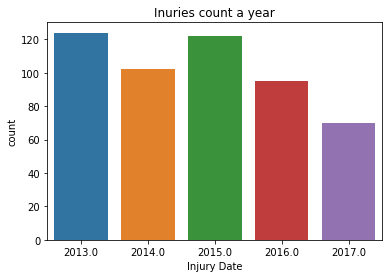

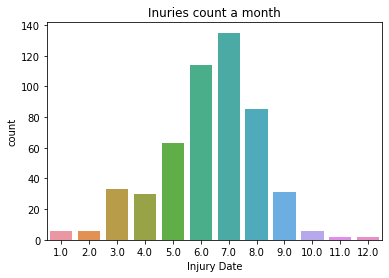

In [31]:
year = raw_injury['Injury Date'].dt.year
ax = sns.countplot(x=year)
ax.set_title('Inuries count a year')
plt.show()

month = raw_injury['Injury Date'].dt.month
ax = sns.countplot(x=month)
ax.set_title('Inuries count a month')
plt.show()

Het is duidelijk te zien dat de meeste ongelukken in de zomer plaatsvinden. Dit is vrij logisch aangezien dit het hoogseizoen is. 

***Ride Name***

In [32]:
raw_injury['Ride Name'].unique()

array(['I Fly', 'Gulf Glider', 'Howlin Tornado',
       'Scooby Doo Ghost Blasters', 'Alien Abduction', 'Go Karts',
       'Gold River Adventure', 'Titan', 'Wild River', 'Sky Ride 2',
       'iFly Austin  ', 'LaVibra', 'Go Kart Track',
       'Rock 2 Drop 2 Rockwall', 'Zipline # 6', 'Batman',
       'New York Adventure', 'Texas Tumble', 'Dragon Blaster',
       'Roaring Rapids', "Howlin' Tornado", "Viper's Tail",
       'Walhalla Wave', 'Kiddie Pro Racer', 'Thunder Road', 'Kamikaze',
       'Banzi', 'El Sombrero', 'Brain Drain', 'Chaparral Cars', 'Leaky',
       'Shot Gun Falls', 'Wizards Waterway', 'Treehouse', 'Tornado',
       'Alien Vortex', 'Tsunami Surge', 'Mr. Freeze', 'Go-Karts',
       'El Aseradero', 'Mine shaft', 'Dragons Revenge', 'Mine Train',
       'Mine Shaft', 'Train', 'Cliffhanger', 'River Raft Ride',
       'Cibolo Falls 1', 'Coyote Cannon', 'Runaway Mountain',
       'F5 Twin Twisters', 'Blackhole', 'Black Knight', 'Texas Giant',
       'LaVibora', 'Goliath', 'Kiddi

In [33]:
raw_injury['Ride Name'].isna().sum()

1

In [34]:
raw_injury.loc[raw_injury['Ride Name'].isna()]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
524,305.0,Wonderland Amusement Park,Amarillo,TX,2017-08-13,NaN,NaN,F,32,Her child's leg was skinned and her left arm hurt,Storm came in with huge winds and rains,She says wind blew golf entry gate into her an...,NaN


***Gender***

In [35]:
raw_injury['Gender'].unique()

array(['F', 'M', nan, 'm'], dtype=object)

Binnen de kolom 'Gender' zijn mannen door een hoofdletter 'M' en een kleine letter 'm' aangegeven. Dit is makkelijk op te lossen door alle letters klein te schrijven.

In [36]:
raw_injury['Gender'] = raw_injury['Gender'].str.lower()
raw_injury['Gender'].unique()

array(['f', 'm', nan], dtype=object)

Nu zijn alle waarden hetzelfde en kunnen de missende waarde worden onderzocht

In [37]:
raw_injury['Gender'].isna().sum()

9

In [38]:
raw_injury.loc[raw_injury['Gender'].isna()]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
12,253.0,Six Flags Over Texas,Arlington,TX,2013-04-06,LaVibra,Jan-11,NaN,45,Tail bone,Contusion,Guest slipped off seat,NaN
99,300.0,Six Flags - Hurricane Harbor,Arlington,TX,2013-08-12,Typhoon Twister,1315-C1-T1-PT54-BWL40,NaN,17,Right Eye,Laceration,Hit eye with knee,NaN
141,1954.0,New York Texas Zipline Adventures,Poynor,TX,2014-03-13,Zipline,02 # 2,NaN,64,Right ankle,Broken ankle,participant was leaving # 2 platform and drug ...,NaN
338,298.0,Wet N Wild Waterworld - Valcanic Gardens Manag...,Anthony,TX,2015-08-09,Amazon,NaN,NaN,15,Head,Laceration to head,Rode incorrectly and bumped back of head on slide,NaN
344,157.0,ARW Kiddie Park,San Antonio,TX,2015-08-14,Kiddie Park,NaN,NaN,4,Whole body,Felt like fainting,Heat,NaN
379,2577.0,WOODLANDS PARTY RENTAL INC,Spring,TX,2016-05-06,Inflatable Barnyard,NaN,NaN,0,NaN,NaN,NaN,NaN
406,298.0,WET N WILD WATERWORLD ‐ VOLCANIC GARDENS MANAG...,Anthony,TX,2016-06-28,Soaker,NaN,NaN,8,Shoulder,Pain,NaN,NaN
467,542.0,Houston Aquarium Restaurant,Houston,TX,NaT,Revolution,422-00212,NaN,13,Right top side of head,Small red area,Alleged faulty installation by third party ele...,The matter is being handled by insurance and b...
468,157.0,ARW Kiddie Park,San Antonio,TX,2017-02-19,John Carride,NaN,NaN,1,Body,Scratches on body,Fell off car ride and was dragged,NaN


In [39]:
raw_injury.Gender.value_counts(normalize=True)

f    0.538899
m    0.461101
Name: Gender, dtype: float64

In [40]:
raw_injury['Gender'].unique()

array(['f', 'm', nan], dtype=object)

***Age***

In [41]:
raw_injury['Age'].unique()
raw_injury['Age'].where( raw_injury['Age'] != '30s', 35, inplace=True)
raw_injury['Age'].where( raw_injury['Age'] != 'mid-60s', 65 , inplace=True)

Veel ongelukken gebeuren bij baby's met een leeftijd '0'

In [42]:
raw_injury.loc[raw_injury['Age']==0]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
11,65.0,Celebration Station Mesquite,Mesquite,TX,2013-03-30,Go Karts,"11, 22",f,0,Back & leg,Pain,The injured did not properly follow the direct...,NaN
24,837.0,Great Wolf Lodge,Grapevine,TX,2013-05-12,Howlin Tornado,0643-C1-T1-TN60,f,0,Neck,Injured person stated her neck hurt after ridi...,unknown,NaN
28,253.0,Six Flags Over Texas,Arlington,TX,2013-05-27,Batman,IC-T99,m,0,Neck,Contusion,Unknown,No outside medical confirmed
29,837.0,Great Wolf Lodge,Grapevine,TX,2013-05-29,Kiddie Pro Racer,0643-C3-T10-KPR,f,0,Ankle,Ankle hurt after injured person stood up at bo...,unknown,NaN
31,837.0,Great Wolf Lodge,Grapevine,TX,2013-06-01,Howlin Tornado,0643-C1-T1-TN60,f,0,Back,Injured person fell off of tube and hit back o...,unknown,NaN
46,300.0,Six Flags - Hurricane Harbor,Arlington,TX,2013-06-25,Tornado,0409-C1-T1-EXT-TN,m,0,Right eye,Laceration,Hit eye on his knee,NaN
65,837.0,Great Wolf Lodge,Grapevine,TX,2013-07-07,Coyote Cannon,0643-C1-T5-BWL40,m,0,Hand,Abrasion on hand,Unknown,NaN
81,260.0,Splashtown - San Antonio,San Antonio,TX,2013-07-22,Double Dipper,NaN,m,0,Left Arm,Laceration,Sharp edge on fiberglass,NaN
88,110.0,Dallas Speed Zone - Apex Parks Group LLC,Dallas,TX,2013-07-28,Slick Trax,NaN,f,0,Back,Pain in back,cart to cart accident,NaN
92,837.0,Great Wolf Lodge,Grapevine,TX,2013-08-07,Howlin' Tornado,0643-C1-T1-TN60,m,0,Head,Hit head on slide surface,NaN,NaN


Het is te betwijfelen of de leeftijden correct zijn genoteerd en de '0' waarden NaN waarden horen te zijn

In [43]:
raw_injury['Age'].isna().sum()

39

In [44]:
raw_injury.loc[raw_injury['Age'].isna()]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
2,837.0,Great Wolf Lodge,Grapevine,TX,2013-03-03,Howlin Tornado,0643-C1-T1-TN60,f,NaN,Right Shoulder,Pain in shoulder,Injured person fell out of raft and hit her sh...,NaN
25,837.0,Great Wolf Lodge,Grapevine,TX,2013-05-18,Howlin' Tornado,0643-C1-T1-TN61,f,NaN,Lip,Injured person bit her lip while riding slide,Injured person bit her lip while riding slide,NaN
55,837.0,Great Wolf Lodge,Grapevine,TX,2013-06-30,Howlin' Tornado,0643-C1-T1-TN60,m,NaN,Lower Back,Injured person's back hurt after riding Tornado,unknown,NaN
63,305.0,Wonderland Amusement Park,Amarillo,TX,2013-07-07,River Raft Ride,608701,f,NaN,Knot above right eye and right knee was sore,bruises,She is blind. Was in 6 person raft - standing....,NaN
73,300.0,Six Flags - Hurricane Harbor,Arlington,TX,2013-07-16,Tornado,0409-C1-T1-EXT-TN,f,NaN,Chin,Puncture wound,Fell on steps getting out of catch pool,NaN
98,305.0,Wonderland Amusement Park,Amarillo,TX,2013-08-11,Shoot the chute,21001,m,NaN,Chest,"Pain in ribs, maybe just bruised","As boat came down incline, his body came forwa...",His brother and 2 nieces rode with him. Not hurt.
107,65.0,Celebration Station Mesquite,Mesquite,TX,2013-08-23,Go Kart - Que Line,NaN,m,NaN,Head,Knocked unconscious,He attempted to step/jump over the que chain a...,NaN
110,305.0,Wonderland Amusement Park,Amarillo,TX,2013-08-31,Shoot the Chute,21001,f,NaN,Ribs,She claims 3 broken ribs on right side,Claims lap bar went forward and back on her as...,All lap bars were checked by maintenance and w...
125,63.0,Zuma Fun Center S Houston,Houston,TX,NaT,Go-Karts,6635,f,NaN,Back,Back injury,Go-Kart crashed into rail,NaN
132,110.0,Dallas Speed Zone - Apex Parks Group LLC,Dallas,TX,2014-01-19,Slick Trax,NaN,f,NaN,Neck Pain,Hit sideways by another cart,Cart to cart hit.,NaN


Text(0.5, 1.0, 'Aantal incidenten per leeftijds groep')

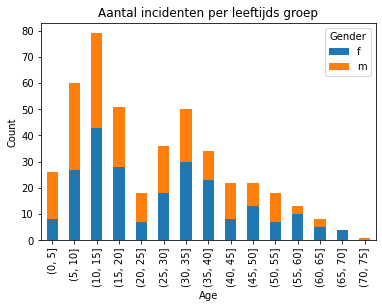

In [45]:
temp = raw_injury[raw_injury['Age'] > 0]
age = pd.cut(temp['Age'], np.arange(0,80,5))
temp.groupby(['Gender', age])\
       .size()\
       .unstack(0)\
       .plot.bar(stacked=True)
plt.ylabel('Count')
plt.title('Aantal incidenten per leeftijds groep')

***Body Part***

In [46]:
raw_injury['Body Part'].str.title().unique()

array(['Mouth', 'Knee', 'Right Shoulder', 'Lower Leg', 'Head',
       'Bottom Of Foot', 'Right Shoulder, Right Knee', 'Back',
       'Neck And Back', 'Left Leg', 'Shoulder', 'Back & Leg', 'Tail Bone',
       'Ankle', 'Foot & Leg', 'Tooth', 'Neck', 'Lower Back',
       'Left Forearm', 'Lip', 'Upper Back ', 'Left Back/Right Leg',
       'Right Foot', 'Right Pinky Finger', 'Possible Seizure', 'Elbow',
       'Face', 'Nose', 'Chin', 'Right Eye', 'Left Eyebrow', 'Forehead',
       'Wrist', 'Left Eye', 'Ear', 'Head/Neck/Back', 'Genital Area',
       'Knot Above Right Eye And Right Knee Was Sore', 'Right Elbow',
       'Hand', 'Head/Back', 'Abdomen', 'Multiple', 'Hands', 'Right Knee',
       'Left Arm', 'Right Clavical', nan, 'Tailbone', 'Left Ankle',
       'Cheek', 'Chest', 'Glutes', 'Back Of Head', 'Ribs', 'Left Wrist',
       'Left Shoulder', 'Left Shoulder Blade/Upper Back',
       'Right Shoulder/Upper Back', 'Head/Neck', 'Right And Left Hands',
       'Right Wrist', 'Left Elbow', 'Left

In [47]:
raw_injury[raw_injury['Body Part'] == 'unknown'] = np.nan
raw_injury[raw_injury['Body Part'] == 'Unknown'] = np.nan
raw_injury[raw_injury['Body Part'] == 'Unknown injuries, transported to hospital'] = np.nan
raw_injury[raw_injury['Body Part'] == 'Left'] = np.nan
raw_injury['Body Part'].isna().sum()

11

In [48]:
raw_injury.loc[raw_injury['Body Part'].isna()]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
93,837.0,Great Wolf Lodge,Grapevine,TX,2013-08-07,Howlin' Tornado,0643-C1-T1-TN60,m,0,NaN,Broken teeth / injured jaw,Raft flipped,NaN
124,110.0,Dallas Speed Zone - Apex Parks Group LLC,Dallas,TX,NaT,Go Kart Track,NaN,m,0,NaN,NaN,Seizure,NaN
224,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
236,2236.0,Skygroup Investments LLC DBA iFly Dallas,Frisco,TX,NaT,iFly Dallas,14R4,f,60,NaN,"Fall on stairs, possible shock, unconscious","Possible vertigo, hard to say",NaN
378,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,2577.0,WOODLANDS PARTY RENTAL INC,Spring,TX,2016-05-06,Inflatable Barnyard,NaN,NaN,0,NaN,NaN,NaN,NaN
389,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2236.0,Skygroup Investments LLC DBA iFly Dallas,Frisco,TX,2016-09-10,Wind Tunnel,SV027,f,50,NaN,Epileptic seizure,NaN,NaN


Uit 'Alleged Injury' kunnen waardes worden gehaald. Regel 93 is duidelijk teeth en jaw. Regel 236 is de verwonde unconscious hierdoor wordt er vanuitgegaan dat in ieder geval de hoofd is gestoten tijdens de val. 

In [49]:
raw_injury.loc[raw_injury.index == 93, 'Body Part'] = 'teeth, jaw'
raw_injury.loc[raw_injury.index == 236, 'Body Part'] = 'head'

Nan rijen worden uit de dataset gehaald

In [50]:
raw_injury = raw_injury.drop([224,225,378,389,435,475])
raw_injury['Body Part'].isna().sum()

3

In [51]:
raw_injury.loc[raw_injury['Body Part'].isna()]

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other
124,110.0,Dallas Speed Zone - Apex Parks Group LLC,Dallas,TX,NaT,Go Kart Track,NaN,m,0,NaN,NaN,Seizure,NaN
379,2577.0,WOODLANDS PARTY RENTAL INC,Spring,TX,2016-05-06,Inflatable Barnyard,NaN,NaN,0,NaN,NaN,NaN,NaN
458,2236.0,Skygroup Investments LLC DBA iFly Dallas,Frisco,TX,2016-09-10,Wind Tunnel,SV027,f,50,NaN,Epileptic seizure,NaN,NaN


In [52]:
raw_injury['Body Part'] = raw_injury['Body Part'].str.lower()

In [53]:
raw_injury['Arm'] = raw_injury['Body Part'].str.contains('arm') | raw_injury['Body Part'].str.contains('houlder')| raw_injury['Body Part'].str.contains('elbow')| raw_injury['Body Part'].str.contains('wrist')
raw_injury['Leg'] = raw_injury['Body Part'].str.contains('leg') | raw_injury['Body Part'].str.contains('knee')
raw_injury['Foot'] = raw_injury['Body Part'].str.contains('foot') | raw_injury['Body Part'].str.contains('toe') | raw_injury['Body Part'].str.contains('ankle')
raw_injury['Hand'] = raw_injury['Body Part'].str.contains('hand') | raw_injury['Body Part'].str.contains('finger') | raw_injury['Body Part'].str.contains('ankle')| raw_injury['Body Part'].str.contains('thumb')
raw_injury['Head'] = raw_injury['Body Part'].str.contains('head') | raw_injury['Body Part'].str.contains('brow') | raw_injury['Body Part'].str.contains('chin') | raw_injury['Body Part'].str.contains('face')| raw_injury['Body Part'].str.contains('eye')| raw_injury['Body Part'].str.contains('mouth')| raw_injury['Body Part'].str.contains('ear')| raw_injury['Body Part'].str.contains('lip')| raw_injury['Body Part'].str.contains('ear')| raw_injury['Body Part'].str.contains('tooth')| raw_injury['Body Part'].str.contains('jaw')| raw_injury['Body Part'].str.contains('teeth')| raw_injury['Body Part'].str.contains('consciousness')
raw_injury['Torso'] = raw_injury['Body Part'].str.contains('back') | raw_injury['Body Part'].str.contains('neck')| raw_injury['Body Part'].str.contains('body')| raw_injury['Body Part'].str.contains('hip')| raw_injury['Body Part'].str.contains('vagina')| raw_injury['Body Part'].str.contains('tail')| raw_injury['Body Part'].str.contains('thigh')| raw_injury['Body Part'].str.contains('genital')| raw_injury['Body Part'].str.contains('top')| raw_injury['Body Part'].str.contains('genital')| raw_injury['Body Part'].str.contains('abdomen')| raw_injury['Body Part'].str.contains('coller')| raw_injury['Body Part'].str.contains('collar')| raw_injury['Body Part'].str.contains('midsection')| raw_injury['Body Part'].str.contains('stomach')| raw_injury['Body Part'].str.contains('rib')| raw_injury['Body Part'].str.contains('chest')| raw_injury['Body Part'].str.contains('groin')| raw_injury['Body Part'].str.contains('Clavicle')| raw_injury['Body Part'].str.contains('glutes')| raw_injury['Body Part'].str.contains('butt')

In [54]:
raw_injury.head()

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other,Arm,Leg,Foot,Hand,Head,Torso
0,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-02-12,I Fly,SV024,f,37,mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN,False,False,False,False,True,False
1,1897.0,Willie G's Post Oak Inc. - Pleasure Pier,Galveston,TX,2013-03-02,Gulf Glider,GS-11-10-WG-14,f,43,knee,Alleged arthroscopy to knee,Hit her knee on a chair on the ride,Prior history of problems with this knee. Firs...,False,True,False,False,False,False
2,837.0,Great Wolf Lodge,Grapevine,TX,2013-03-03,Howlin Tornado,0643-C1-T1-TN60,f,NaN,right shoulder,Pain in shoulder,Injured person fell out of raft and hit her sh...,NaN,True,False,False,False,False,False
3,99.0,Six Flags Fiesta Texas,San Antonio,TX,2013-03-03,Scooby Doo Ghost Blasters,NaN,f,51,lower leg,Contusion,Guest backed into advancing car,NaN,False,True,False,False,False,False
4,55.0,"Ray Cammack Shows, Inc. (RCS)",Laveen,AZ,2013-03-11,Alien Abduction,862162,f,17,head,Laceration,unknown guest did not report to operator or at...,Upon investigation found no areas of concern a...,False,False,False,False,True,False


## 3.2.2 Population dataframe

In [55]:
raw_pop.head()

,Rank,Geographic Area,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0
5,3,"Chicago city, Illinois",2695598,2695652,2697477,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0
6,4,"Houston city, Texas",2099451,2095517,2100280,2126032.0,2161593.0,2199391.0,2241826.0,2286908.0,2309544.0,2316750.0,2318573.0,2320268.0
7,5,"Phoenix city, Arizona",1445632,1446691,1449038,1469796.0,1499274.0,1526491.0,1555445.0,1583690.0,1612199.0,1633560.0,1654675.0,1680992.0


Van de populatie dataset moet de stad en plaats van elkaar woredn gehaald zodat deze toegevoegd kan worden aan de andere dataset. Om populatie met elkaar te vergelijken is er voor gekozen een gemiddelde populatie te nemen van 2013 tot 2017.

In [56]:
raw_pop.loc[raw_pop['Geographic Area'].isna()]

,Rank,Geographic Area,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
791,Note: Areas are included in this table if they...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
792,Suggested Citation:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794,"Source: U.S. Census Bureau, Population Division",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
795,Release Date: May 2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De missende waarde uit deze dataset is niet bruikbaar en kan daarom worden verwijderd

In [57]:
raw_pop = raw_pop.drop([791,792,793,794,795])

De kolom 'Geographic Area' bestaat nu uit twee onderdelen, de stad en de staat. De stad kan goed gebruikt worden als primary key. de staat kan gebruikt worden om de data in te korten en de staat texas te selecteren.

In [58]:
raw_pop['City'] = raw_pop['Geographic Area'].apply(lambda x: x.split(',')[0])
raw_pop['St'] = raw_pop['Geographic Area'].apply(lambda x: x.split(', ')[1])

Achter alle steden staat ' city'. Dit stuk text moet uit de string worden gehaald om de datasets te kunnen mergen.

In [59]:
raw_pop['City'] = raw_pop['City'].apply(lambda x: x.rstrip(' city'))

In [60]:
raw_pop.head()

,Rank,Geographic Area,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,City,St
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0,New York,New York
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0,Los Angeles,California
5,3,"Chicago city, Illinois",2695598,2695652,2697477,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0,Chicago,Illinois
6,4,"Houston city, Texas",2099451,2095517,2100280,2126032.0,2161593.0,2199391.0,2241826.0,2286908.0,2309544.0,2316750.0,2318573.0,2320268.0,Houston,Texas
7,5,"Phoenix city, Arizona",1445632,1446691,1449038,1469796.0,1499274.0,1526491.0,1555445.0,1583690.0,1612199.0,1633560.0,1654675.0,1680992.0,Phoenix,Arizona


Van de gegevens wordt de gemiddelde populatie over de periode 2013 tot 2017 berkend, aangezien dit ook de tijdspan is van de ongevallen dataset.

In [61]:
raw_pop['pop 13-17 mean'] = (raw_pop[2013.0] + raw_pop[2014.0] + raw_pop[2015.0] + raw_pop[2016.0] + raw_pop[2017.0])/5

In [62]:
raw_pop.head()

,Rank,Geographic Area,Census,Estimates Base,2010,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,City,St,pop 13-17 mean
3,1,"New York city, New York",8175133,8175031,8190209,8272948.0,8346693.0,8396091.0,8433806.0,8463049.0,8469153.0,8437478.0,8390081.0,8336817.0,New York,New York,8439915.4
4,2,"Los Angeles city, California",3792621,3793139,3795512,3820876.0,3851202.0,3881622.0,3909901.0,3938568.0,3963226.0,3975788.0,3977596.0,3979576.0,Los Angeles,California,3933821.0
5,3,"Chicago city, Illinois",2695598,2695652,2697477,2708114.0,2719141.0,2725731.0,2727066.0,2724344.0,2716723.0,2711069.0,2701423.0,2693976.0,Chicago,Illinois,2720986.6
6,4,"Houston city, Texas",2099451,2095517,2100280,2126032.0,2161593.0,2199391.0,2241826.0,2286908.0,2309544.0,2316750.0,2318573.0,2320268.0,Houston,Texas,2270883.8
7,5,"Phoenix city, Arizona",1445632,1446691,1449038,1469796.0,1499274.0,1526491.0,1555445.0,1583690.0,1612199.0,1633560.0,1654675.0,1680992.0,Phoenix,Arizona,1582277.0


Van de dataset gebruiken we alleen de 'City' kolom aangezien dit de primary key is om de datasets te mergen en de gemiddelde populatie van 2013 tot 2017. Voor de merg is het belangrijk dat de steden met kleine letter zijn genoteerd.

In [63]:
raw_pop = raw_pop[["City", 'pop 13-17 mean']]
raw_pop['City'] = raw_pop['City'].str.title()
raw_pop.head()

,City,pop 13-17 mean
3,New York,8439915.4
4,Los Angeles,3933821.0
5,Chicago,2720986.6
6,Houston,2270883.8
7,Phoenix,1582277.0


In [64]:
raw_join = raw_injury.merge(raw_pop, on='City')

In [65]:
raw_join.head()

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other,Arm,Leg,Foot,Hand,Head,Torso,pop 13-17 mean
0,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-02-12,I Fly,SV024,f,37,mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN,False,False,False,False,True,False,917657.4
1,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-03-28,iFly Austin,SV024,m,10,shoulder,Held shoulder in pain - continued flying,No conclusion,NaN,True,False,False,False,False,False,917657.4
2,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-04-14,I Fly,SV024,f,14,shoulder,Possible dislocation,Adjusting body position,NaN,True,False,False,False,False,False,917657.4
3,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-06-08,I Fly,SV024,m,48,possible seizure,Appeared to have a seizure,No conclusion,NaN,False,False,False,False,False,False,917657.4
4,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-07-27,iFLY Austin,SV024,f,29,shoulder,Possible dislocation,Reaching out at wall,NaN,True,False,False,False,False,False,917657.4


In [66]:
raw_join['pop 13-17 mean'].isnull().sum()

0

Er zijn geen null waarden. Dit betekend dat de volledige dataset is aangevulde met de populatiegrootte van de stad waar het pretpark in staat.

## 3.2.3 Income dataframe

In [67]:
raw_inc.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


Uit deze dataset kan de 'City' kolom gebruikt worden als primary key. Voor de merg is het belangrijk dat de waardes met kleine letter zijn geschreven is daardoor dus aangepast.

In [68]:
raw_inc['City'] = raw_inc['City'].str.title()
di = {'Mean': 'mean', 'Median': 'mean','Stdev':'mean','sum_w':'mean'}
income_texas = raw_inc.query('State_ab == "TX" or State_ab == "AZ"')
income_texas_sort = income_texas.groupby(by ='City').aggregate(di)
income_texas_sort.head(5)

,Mean,Median,Stdev,sum_w
City,,,,
Abilene,51258.923077,79425.538462,38462.769231,438.606201
Addison,81139.000000,70948.000000,47729.000000,679.219764
Adrian,71688.000000,50239.500000,70619.500000,107.878779
Ajo,48950.000000,30239.500000,46654.500000,133.209688
Albany,51581.000000,50345.000000,39442.000000,567.667262


In [69]:
#raw_injury[raw_injury['City'].isin(income_texas_sort.index)]

In [70]:
raw_join = pd.merge(raw_join, income_texas_sort, on='City' )
raw_join.head(3)

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other,Arm,Leg,Foot,Hand,Head,Torso,pop 13-17 mean,Mean,Median,Stdev,sum_w
0,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-02-12,I Fly,SV024,f,37,mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN,False,False,False,False,True,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367
1,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-03-28,iFly Austin,SV024,m,10,shoulder,Held shoulder in pain - continued flying,No conclusion,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367
2,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-04-14,I Fly,SV024,f,14,shoulder,Possible dislocation,Adjusting body position,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367


In [71]:
part_list = ['Arm', 'Leg', 'Foot', 'Hand', 'Head','Torso']
raw_join['Body part'] = 'Unknown'

for part in part_list:
    raw_join['Body part'].where(raw_join[part] == False, part, inplace=True)

raw_join.head()

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other,Arm,Leg,Foot,Hand,Head,Torso,pop 13-17 mean,Mean,Median,Stdev,sum_w,Body part
0,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-02-12,I Fly,SV024,f,37,mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN,False,False,False,False,True,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Head
1,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-03-28,iFly Austin,SV024,m,10,shoulder,Held shoulder in pain - continued flying,No conclusion,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Arm
2,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-04-14,I Fly,SV024,f,14,shoulder,Possible dislocation,Adjusting body position,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Arm
3,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-06-08,I Fly,SV024,m,48,possible seizure,Appeared to have a seizure,No conclusion,NaN,False,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Unknown
4,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-07-27,iFLY Austin,SV024,f,29,shoulder,Possible dislocation,Reaching out at wall,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Arm


In [72]:
drop_count = widgets.Dropdown(
    options = ['City', 'Body part'],
    value = 'City',
    description = 'Column to count: '
)

count_menu1 = widgets.HBox([drop_count])


In [73]:
check_m = widgets.Checkbox(
    value=False,
    description='Men only',
    disabled=False
)

check_f = widgets.Checkbox(
    value=False,
    description='Women only',
    disabled=False
)

widgets.jslink((check_m, 'disabled'), (check_f, 'value'))
widgets.jslink((check_f, 'disabled'), (check_m, 'value'))
    
sex_menu = widgets.HBox([check_m, check_f])

In [74]:
age_low = widgets.IntSlider(
    value = 0,
    min = 0,
    max = raw_injury['Age'].max(),
    description = 'Minimum age',
    continuous_update=False
)

age_high = widgets.IntSlider(
    value = raw_injury['Age'].max(),
    min = 0,
    max = raw_injury['Age'].max(),
    description = 'Maximum age',
    continuous_update=False
)

widgets.jslink((age_low, 'max'), (age_high, 'value'))
widgets.jslink((age_high, 'min'), (age_low, 'value'))

age_menu = widgets.HBox([age_low, age_high])

In [75]:
def plot1(col, m, f, min, max):
    plt.style.use('default')
    if m:
        plot_df = raw_join[ raw_join['Gender'] == 'm']
    elif f:
        plot_df = raw_join[ raw_join['Gender'] == 'f']
    else:
        plot_df = raw_join
    
    plot_df = plot_df[ (plot_df['Age'] >= min) & (plot_df['Age'] <= max) ]
    if m or f:
        ax = sns.countplot(x=col, data=plot_df)
    else:
        ax = sns.countplot(x=col, hue='Gender', data=plot_df)   
        
    plt.xticks(rotation=60)
    
    return ax.set_title('Injuries per '+ col.lower() +' from ages ' + str(min) + ' to ' + str(max))

out1 = widgets.interactive_output(plot1, {'col': drop_count, 'm': check_m, 'f': check_f, 
                                       'min': age_low, 'max': age_high})

frame1 = widgets.VBox([count_menu1, sex_menu, age_menu, out1])

In [76]:
display(frame1)

In [77]:
parks_per_city = {}

for city in raw_injury['City'].str.title().unique().tolist():
    park_list = raw_injury[raw_injury['City'] == city.title()]['Name of Operation'].unique().tolist()
    park_list.sort()
    parks_per_city[city] = park_list

print(parks_per_city)    

{'Austin': ['Skygroup Investments LLC DBA iFly Austin', 'Texas Bells and Whistles'], 'Galveston': ['Schlitterbahn Galveston', 'Schlitterbahn Galveston Island', "Willie G's Post Oak Inc. - Pleasure Pier"], 'Grapevine': ['Great Wolf Lodge'], 'San Antonio': ['ARW Kiddie Park', 'JW Marriott San Antonio', 'San Antonio Zoo', 'Sea World Texas Inc', 'SeaWorld Texas Inc.', 'Six Flags Fiesta Texas', 'Splashtown - San Antonio'], 'Laveen': ['Ray Cammack Shows, Inc. (RCS)'], 'Seguin': ["ZDT's Amusement Center LTD"], 'Arlington': ['SIX FLAGS\xa0‐\xa0HURRICANE HARBOR', 'Six Flags - Hurricane Harbor', 'Six Flags Over Texas'], 'Mesquite': ['Celebration Station Mesquite'], 'Cedar Hill': ["Ellen's Amusement Center"], 'Englewood': ['Extreme Sports'], 'Poynor': ['New York Texas Zipline Adventures'], 'Spring': ['Houston Party Rental', 'Houston Party Rentals Inc.', 'SPLASHTOWN\xa0‐\xa0SPRING, TX', 'Splashtown - Spring, TX', 'WOODLANDS PARTY RENTAL INC'], 'Dallas': ['DALLAS SPEED ZONE\xa0‐\xa0APEX PARKS GROUP

In [78]:
raw_join['City'].str.title().unique().tolist()

['Austin',
 'Galveston',
 'Grapevine',
 'San Antonio',
 'Arlington',
 'Mesquite',
 'Dallas',
 'Houston',
 'New Braunfels',
 'Amarillo',
 'Longview',
 'Mcallen',
 'Waco',
 'Irving',
 'Mansfield',
 'Pflugerville',
 'Garland',
 'Frisco',
 'El Paso',
 'Grand Prairie']

In [79]:
city_list = raw_join['City'].str.title().unique().tolist()
city_list.sort()

drop_city = widgets.Dropdown(
    options = city_list,
    value= 'Dallas',
    description = 'City: '
)

drop_park = widgets.Dropdown(
    options = parks_per_city[drop_city.value],
    value = parks_per_city[drop_city.value][0],
    description = 'Park: '
)

def park_options(change):
    drop_park.options = parks_per_city[change.new]
    drop_park.value = parks_per_city[change.new][0]
    
drop_city.observe(park_options, names='value')

park_menu = widgets.HBox([drop_city, drop_park])

In [80]:
def plot2(city, park):
    plt.style.use('default')
    plot_df = raw_injury
    plot_df = plot_df[ (plot_df['City'] == city.title()) & (plot_df['Name of Operation'] == park) ]
    
    ax = sns.countplot(x='Ride Name', data=plot_df)
    plt.xticks(rotation=90)
    ax.set_title('Injuries per ride in '+ park.title())
    return ax

out2 = widgets.interactive_output(plot2, {'city': drop_city, 'park': drop_park})

frame2 = widgets.VBox([park_menu, out2])

In [81]:
display(frame2)

In [82]:
raw_join['Total injuries'] = 0

for city in raw_join['City'].unique().tolist():
    total = raw_join[ raw_join['City'] == city].shape[0]
    raw_join['Total injuries'].where( raw_join['City'] != city, total, inplace=True)

raw_join['Injuries per capita'] = raw_join['Total injuries'] / raw_join['pop 13-17 mean']
raw_join.head()

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other,Arm,Leg,Foot,Hand,Head,Torso,pop 13-17 mean,Mean,Median,Stdev,sum_w,Body part,Total injuries,Injuries per capita
0,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-02-12,I Fly,SV024,f,37,mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN,False,False,False,False,True,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Head,17,0.000019
1,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-03-28,iFly Austin,SV024,m,10,shoulder,Held shoulder in pain - continued flying,No conclusion,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Arm,17,0.000019
2,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-04-14,I Fly,SV024,f,14,shoulder,Possible dislocation,Adjusting body position,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Arm,17,0.000019
3,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-06-08,I Fly,SV024,m,48,possible seizure,Appeared to have a seizure,No conclusion,NaN,False,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Unknown,17,0.000019
4,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-07-27,iFLY Austin,SV024,f,29,shoulder,Possible dislocation,Reaching out at wall,NaN,True,False,False,False,False,False,917657.4,80293.5875,100559.7875,55121.3125,599.077367,Arm,17,0.000019


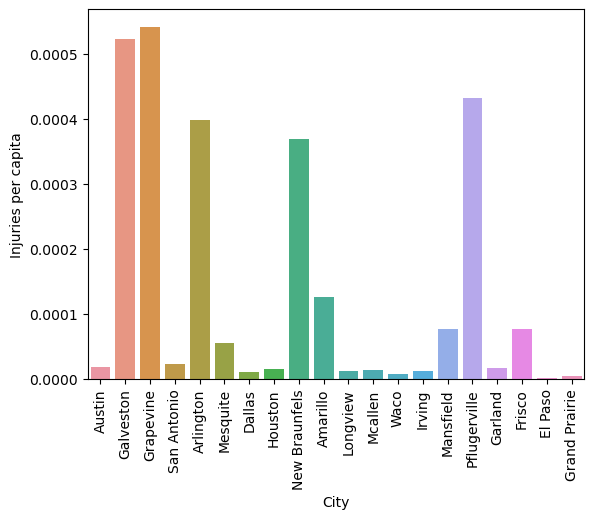

In [83]:
sns.barplot(x='City',y='Injuries per capita', data=raw_join)
plt.xticks(rotation=90)
plt.show()

In [84]:
from ipywidgets.embed import embed_minimal_html

embed_minimal_html('export.html', views=[frame1], title='Widgets export')

In [85]:
raw_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425 entries, 0 to 424
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Injury Report REC    425 non-null    float64       
 1   Name of Operation    425 non-null    object        
 2   City                 425 non-null    object        
 3   St                   425 non-null    object        
 4   Injury Date          403 non-null    datetime64[ns]
 5   Ride Name            424 non-null    object        
 6   Serial No            329 non-null    object        
 7   Gender               420 non-null    object        
 8   Age                  390 non-null    object        
 9   Body Part            423 non-null    object        
 10  Alleged Injury       414 non-null    object        
 11  Cause of Injury      411 non-null    object        
 12  Other                80 non-null     object        
 13  Arm                  425 non-null  

***Other***

Bij de bovenste waarneming is het duidelijk dat de tanden en kaak zijn.

## 3.2.1 kolommen splitsen / verwijderen / hernoemen / 

**verwijderen**

In [86]:
#raw_injury.drop('Other', axis = 1, inplace = True)

**splitsen**

**hernoemnen**

**omrekenen** 

**resultaat**

In [87]:
raw_injury.head()

,Injury Report REC,Name of Operation,City,St,Injury Date,Ride Name,Serial No,Gender,Age,Body Part,Alleged Injury,Cause of Injury,Other,Arm,Leg,Foot,Hand,Head,Torso
0,2032.0,Skygroup Investments LLC DBA iFly Austin,Austin,TX,2013-02-12,I Fly,SV024,f,37,mouth,Student hit mouth on wall,Student attempted unfamiliar manuever,NaN,False,False,False,False,True,False
1,1897.0,Willie G's Post Oak Inc. - Pleasure Pier,Galveston,TX,2013-03-02,Gulf Glider,GS-11-10-WG-14,f,43,knee,Alleged arthroscopy to knee,Hit her knee on a chair on the ride,Prior history of problems with this knee. Firs...,False,True,False,False,False,False
2,837.0,Great Wolf Lodge,Grapevine,TX,2013-03-03,Howlin Tornado,0643-C1-T1-TN60,f,NaN,right shoulder,Pain in shoulder,Injured person fell out of raft and hit her sh...,NaN,True,False,False,False,False,False
3,99.0,Six Flags Fiesta Texas,San Antonio,TX,2013-03-03,Scooby Doo Ghost Blasters,NaN,f,51,lower leg,Contusion,Guest backed into advancing car,NaN,False,True,False,False,False,False
4,55.0,"Ray Cammack Shows, Inc. (RCS)",Laveen,AZ,2013-03-11,Alien Abduction,862162,f,17,head,Laceration,unknown guest did not report to operator or at...,Upon investigation found no areas of concern a...,False,False,False,False,True,False


In [88]:
raw_injury.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 541
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Injury Report REC  530 non-null    float64       
 1   Name of Operation  530 non-null    object        
 2   City               530 non-null    object        
 3   St                 530 non-null    object        
 4   Injury Date        507 non-null    datetime64[ns]
 5   Ride Name          529 non-null    object        
 6   Serial No          383 non-null    object        
 7   Gender             521 non-null    object        
 8   Age                492 non-null    object        
 9   Body Part          527 non-null    object        
 10  Alleged Injury     517 non-null    object        
 11  Cause of Injury    513 non-null    object        
 12  Other              120 non-null    object        
 13  Arm                530 non-null    bool          
 14  Leg       

In [89]:
data_copy = raw_injury.copy() 

## 3.2.2 Datatypes rechtzetten

In [90]:
#data_copy.kolom.dtype

In [91]:
#data_copy.kolom.unique()

## 3.2.3 Duplicates verwijderen

## 3.2.4 generieke verkenning

In [92]:
data_copy.describe()

,Injury Report REC
count,530.000000
mean,738.726415
std,804.243786
min,55.000000
25%,253.000000
50%,300.000000
75%,837.000000
max,2919.000000


In [93]:
#data_copy.dtypes

In [94]:
#df_Marketing_Analysis.nunique(axis=0)

Wat valt op:
* ...

Welke relaties willen we toetse
* §

## Missing values

In [95]:
# Checking the missing values
#data_copy.kolom.kolom.().sum()

In [96]:
#data_copy.kolom.kolom.isnull().sum()

**duplicates**

## 3.2 univariate data analyse

## 3.3 multivariate data analysis

## Conclusion EDA

kan per kolom

kan per type fout/issue

outliers

opslaan data

# 4. Cleaning your dataset


## Removing Redundant variables

## Removing Outliers

 ## outlier Detection

 ## outliers verwijderen / corrigeren

## 4.2 Corrigeren van technisch onmogelijke waardes

* spelfouten
* emailadres zonder @ 
* datum format verkeerd
* discontinuiteit sprong in tijds (bijv meter electrische lader / missendetijd) 

## 4.2 data inputation of missing values

**Missing Values**

If there are missing values in the Dataset before doing any statistical analysis, we need to handle those missing values.
There are mainly three types of missing values.
* MCAR(Missing completely at random): These values do not depend on any other features.
* MAR(Missing at random): These values may be dependent on some other features.
* MNAR(Missing not at random): These missing values have some reason for why they are missing.

Let’s see which columns have missing values in the dataset.

credits: https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14



**invullen missende dat op basis  lineaire regressie**

In [97]:
from sklearn.linear_model import LinearRegression


# 5 Feature engineering

## One hot encoding

## normaliseren

## Standaardiseren

## Max tussen twee kolommen

# 5 Sampling